# Introducción

En esta práctica se analiza el espectro de distintas señales senoidales discretas
mediante la Transformada Discreta de Fourier (DFT). 

La resolución en frecuencia de la DFT está dada por:

$$
\Delta f = \frac{f_s}{N}
$$

donde $f_s$ es la frecuencia de muestreo y $N$ el número de muestras. 

Cada coeficiente $X[k]$ representa la respuesta en frecuencia en un bin asociado a $f_k = k \,\Delta f$.  
Al calcular la Transformada Rápida de Fourier (FFT) se obtienen $N$ muestras del espectro, ubicadas en múltiplos de $\Delta f$.

---

# Señales utilizadas

Se generaron tres senoidales normalizadas (media cero, varianza unitaria):

- $f = f_s/4$ (on–bin)  
- $f = f_s/4 + 0.25\,\Delta f$ (off–bin)  
- $f = f_s/4 + 0.5\,\Delta f$ (off–bin)  


## Punto a)

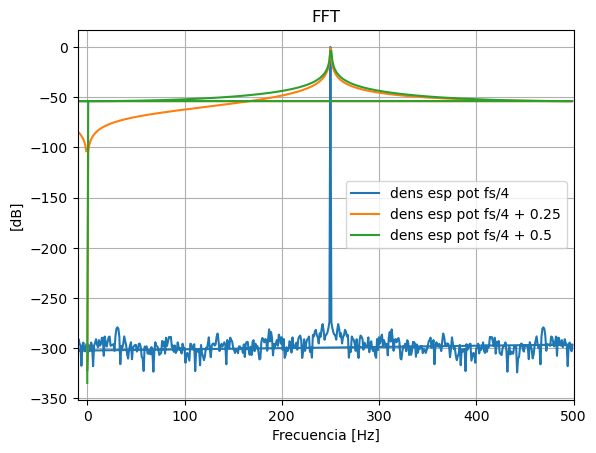

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

#Aca uso todo lo mismo que en la ts1. Tambien podria importar el archivo pero se le va a complicar a los profes.
fs = 1000
N = 1000
f = 2000
Ts = 1/fs
deltaF = fs/N
tt = np.arange(N)*Ts
freqs = np.fft.fftfreq(N, Ts)  

def mi_funcion_sen(f, N, fs, a0=1, fase=0):
    Ts = 1/fs
    tt = np.arange(N) * Ts           # vector de tiempo
    x = a0 * np.sin(2* np.pi * f * tt + fase)  # señal senoidal
    x = x - x.mean() ## aca le saco la media
    x = x / np.sqrt(np.var(x)) ## aca lo divido por la des estandar
    var_x = np.var(x) ## calculo la varianza
    return tt, x, var_x

tt, x1, var_x = mi_funcion_sen( f = fs/4 * deltaF, N = N, fs  = fs )
tt, x2, var_x = mi_funcion_sen( f = (fs/4 + 0.25) * deltaF ,  N = N, fs  = fs )
tt, x3, var_x = mi_funcion_sen( f = (fs/4 + 0.5) * deltaF,  N = N, fs  = fs )


X1 = fft(x1)
X1abs = 1/N * np.abs(X1)

X2 = fft(x2)
X2abs = 1/N * np.abs(X2)

X3 = fft(x3)
X3abs =  1/N * np.abs(X3)

#Densidad espectral de potencia. Paso a db y ademas elevo al cuadrado. Le multplico por dos por algo de la aporximacion de la fft para que me quede bien la mediciion
#graficos
plt.figure()
plt.title("FFT")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("[dB]")
plt.grid(True)
plt.plot(freqs, 10*np.log10(2* X1abs**2) , label = 'dens esp pot fs/4') ##densidad espectral de potencia
plt.plot(freqs, 10*np.log10(2* X2abs**2) , label = 'dens esp pot fs/4 + 0.25') ##densidad espectral de potencia
plt.plot(freqs, 10*np.log10(2*X3abs**2) , label = 'dens esp pot fs/4 + 0.5') ##densidad espectral de potencia
plt.xlim((-10,fs/2))
plt.legend()

# Discusión 

### ¿Qué ocurre si $f_0$ coincide o no con un bin?

- **Caso on–bin ($f_0 = m \,\Delta f$)**  
  La senoidal encaja exactamente en un bin. Toda la energía se concentra en un único coeficiente → aparece un pico limpio.  

- **Caso off–bin ($f_0 = m \,\Delta f + \alpha$)**  
  La frecuencia no cae justo en un bin. La energía se reparte entre varios bins vecinos, dando lugar al *leakage* o desparramo espectral.  

### Kernel de Dirichlet

La DFT de una ventana rectangular está dada por el **Kernel de Dirichlet**, que puede visualizarse como una sinc periódica.  
- Presenta un lóbulo principal centrado en $f_0$.  
- Incluye múltiples lóbulos laterales decrecientes (con forma de sinc).  
- Tiene ceros en posiciones periódicas.  

En la primera gráfica (N muestras) no se aprecia claramente la forma de la sinc, ya que solo se dispone de $N$ bins espaciados por $\Delta f$.  
Para mejorar la visualización se aplicó **zero–padding**: se rellenó la señal de longitud $N$ con $9N$ ceros adicionales. Esto no cambia la potencia, pero densifica la grilla de frecuencias y permite observar mejor la forma de la sinc.  

### Ceros en posiciones periódicas

Tal como se esperaba, en la señal verde correspondiente a $f = f_s/4 + 0.5\,\Delta f$ se observa un “pozo” en el gráfico, donde la magnitud cae a $-\infty$ dB.  
Esto ocurre porque en ese caso un bin de la DFT coincide exactamente con un cero de la sinc. Como $X[k]=0$, al representarlo en escala logarítmica se obtiene:

$$
10\log_{10}(0) = -\infty
$$

En la implementación numérica se observan valores muy negativos (p.ej. −600 dB), lo cual corresponde a la representación finita en la máquina.”
  


# Resultados

## a) Densidad espectral de potencia

La magnitud espectral utilizada en los gráficos fue:

$$
S_{xx}[k] = \frac{|X[k]|^2}{N}
$$

Este escalado facilita la visualización en dB.  
Para la verificación de Parseval se empleó la forma normalizada:

$$
\frac{1}{N^2}\sum_{k=0}^{N-1}|X[k]|^2
$$

# Resultados

## b) Identidad de Parseval

Se verificó que la potencia en el dominio temporal coincide con la potencia en el dominio frecuencial:

$$
\frac{1}{N}\sum_{n=0}^{N-1}|x[n]|^2 \;\approx\; 
\frac{1}{N^2}\sum_{k=0}^{N-1}|X[k]|^2
$$

En los tres casos se obtuvo $P_{time}\approx P_{freq} \approx 1$, confirmando la validez de Parseval.


## Punto b)

In [4]:
pot_tiempo1 = 1/N*np.sum(np.abs(x1)**2)
pot_tiempo2 = 1/N*np.sum(np.abs(x2)**2)
pot_tiempo3 = 1/N*np.sum(np.abs(x3)**2)
pot_frec1 = 1/N**2*np.sum(np.abs(X1)**2)
pot_frec2 = 1/N**2*np.sum(np.abs(X2)**2)
pot_frec3 = 1/N**2*np.sum(np.abs(X3)**2)
    
if np.isclose(pot_tiempo1, pot_frec1, rtol=1e-10, atol=1e-12):
    print("Se cumple Parseval para x1 y X1")
else: 
    print("No se cumple Parseval para x1 y X1")

if np.isclose(pot_tiempo2, pot_frec2, rtol=1e-10, atol=1e-12):
    print("Se cumple Parseval para x2 y X2")
else: 
    print("No se cumple Parseval para x2 y X2")

if np.isclose(pot_tiempo3, pot_frec3, rtol=1e-10, atol=1e-12):
    print("Se cumple Parseval para x3 y X3")
else: 
    print("No se cumple Parseval para x3 y X3")


Se cumple Parseval para x1 y X1
Se cumple Parseval para x2 y X2
Se cumple Parseval para x3 y X3


## Punto c)

### Aplicacion de 0-Padding


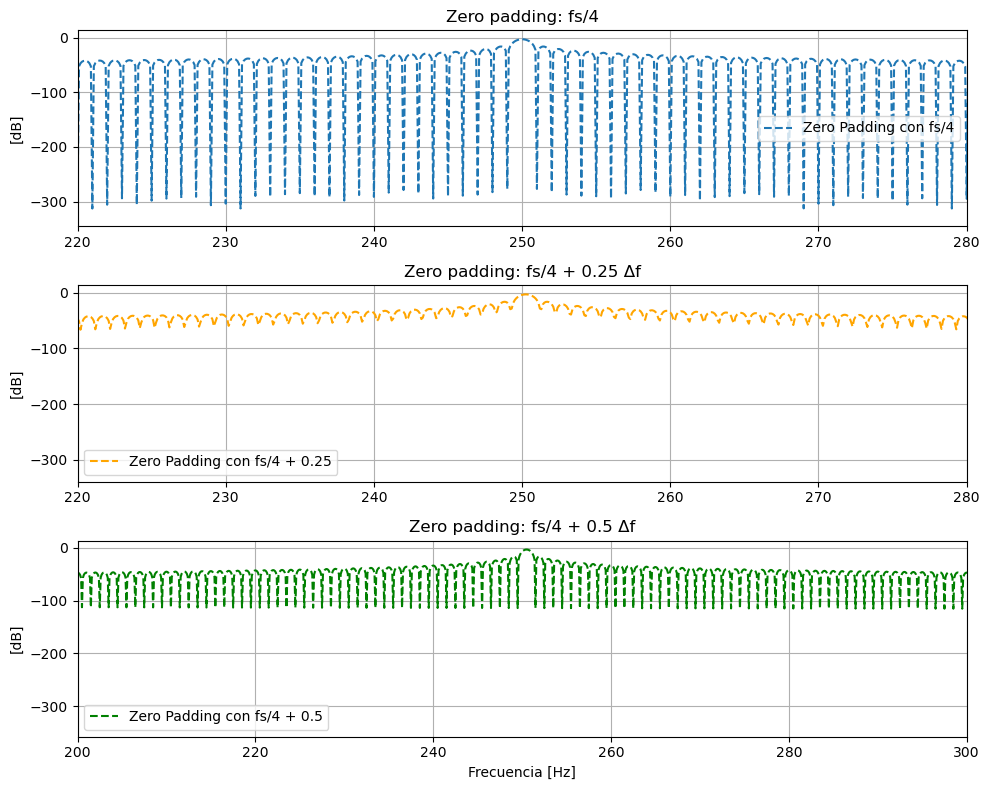

In [5]:
##Zero padding

zeroPadding1 = np.zeros(10 * N)
zeroPadding2 = np.zeros(10 * N)
zeroPadding3 = np.zeros(10 * N)

zeroPadding1[0:N] = x1 #x1 x1 x1 x1  0 0 0 0 0 0 0 0
zeroPadding2[0:N] = x2 #x1 x1 x1 x1  0 0 0 0 0 0 0 0
zeroPadding3[0:N] = x3 #x1 x1 x1 x1  0 0 0 0 0 0 0 0

fft_zeroPadding1 = fft(zeroPadding1)
fft_zeroPadding2 = fft(zeroPadding2)
fft_zeroPadding3 = fft(zeroPadding3)

fft_zeroPadding1abs = 1/N * np.abs(fft_zeroPadding1)
fft_zeroPadding2abs = 1/N * np.abs(fft_zeroPadding2)
fft_zeroPadding3abs = 1/N * np.abs(fft_zeroPadding3)

deltaF1 = fs/(N*10)
freqs1 = np.arange(10 * N) * deltaF1 

plt.figure(figsize=(10,8))

plt.subplot(3, 1, 1)
plt.plot(freqs1, np.log10(fft_zeroPadding1abs**2)*10, '--',label = 'Zero Padding con fs/4')
plt.title('Zero padding: fs/4')
plt.ylabel('[dB]')
plt.grid(True)
plt.legend()
plt.xlim(220, 280) # zoom al lóbulo principal

# Subplot 2
plt.subplot(3, 1, 2)
plt.plot(freqs1, np.log10(fft_zeroPadding2abs**2)*10, '--', color = "orange", label = 'Zero Padding con fs/4 + 0.25')
plt.title('Zero padding: fs/4 + 0.25 Δf')
plt.ylabel('[dB]')
plt.grid(True)
plt.legend()
plt.xlim(220, 280) # zoom al lóbulo principal

# Subplot 3
plt.subplot(3, 1, 3)
plt.plot(freqs1, np.log10(fft_zeroPadding3abs**2)*10, '--',color = "green",label = 'Zero Padding con fs/4 + 0.5')
plt.title('Zero padding: fs/4 + 0.5 Δf')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('[dB]')
plt.grid(True)
plt.legend()
plt.xlim(200, 300) # zoom al lóbulo principal

plt.tight_layout()
plt.show()



# Conclusiones

En este trabajo se analizó el espectro de senoidales discretas usando la FFT.

- Cuando la frecuencia de la señal coincide exactamente con un bin de la FFT (*on–bin*), la energía queda concentrada en un único bin. El espectro muestra un pico limpio y sin dispersión.  
- Cuando la frecuencia no coincide con un bin (*off–bin*), aparece el fenómeno de **leakage**: la energía se reparte entre varios bins vecinos y se visualiza el kernel de Dirichlet con su lóbulo principal y lóbulos laterales.  
- En los casos de $f = f_s/4 + 0.5 \, \Delta f$ y $f = f_s/4 + 0.25 \, \Delta f$ se observó un cero exacto en la sinc, lo que produce una caída de magnitud a $-\infty$ dB en uno de los bins.  
- Se verificó la **identidad de Parseval**, confirmando que la potencia en el tiempo y en frecuencia se conserva y es unitaria para las tres señales.  
- Con la técnica de **zero padding** se comprobó que no cambia la potencia ni la información de la señal, pero permite visualizar mejor la forma de la sinc al densificar la malla de frecuencias.




# Template

Autoevaluación del aprendizaje
Indicar una opción:

Resolví la tarea con seguridad

Responder:

¿Qué aprendiste al hacer esta tarea?
En resumen, el TP me permitió entender que es el leakage, que pasa cuando uso poco muestreo y que pasa cuando agrego resolucion a ese muestreo. Ademas de que se tiene que cumplir parseval cuando normalizo la funcion

¿Qué te quedó claro? ¿Qué te sigue costando?
Me cuesta el analisis de los graficos, mas que nada en porque se forman esos picos al reves en la fs/4+0.25 o que es esa linea que va por el 0db. Por lo que lei es que como el log se aproxima a numeros cercanos a 0eros y por el intepolador de python se forma esa recta.

Indicar si se utilizó IA:

Sí, usé chatGPT

En caso afirmativo, indicar una opción o varias:

Escritura, para armar todo en latex y bien hecho el markdown
Conceptos teorícos, para entender que pasa con las cuentas de la fft por ejemplo
Gráficos
